# **>In this homework, iris data set has been used. A Bayesian model is created using pymc3 with mu and sigma as the parameters and sepal_length as the observed data.**

# **>First of all imports various libraries such as numpy, pymc3, matplotlib, pandas, arviz, and seaborn. It then loads the iris dataset and extracts the sepal_length feature.**

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


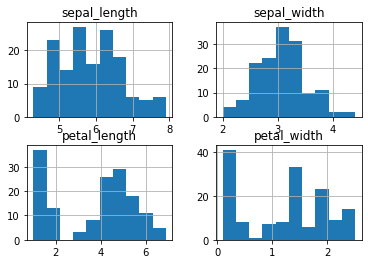

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


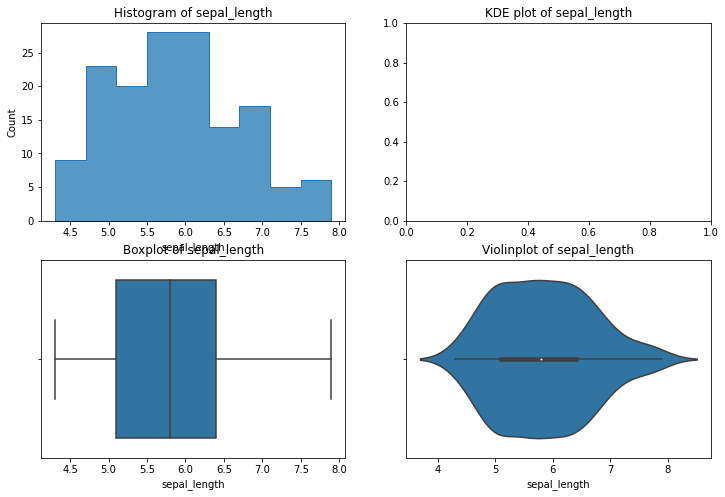

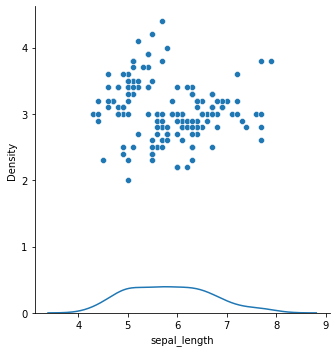

In [24]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import seaborn as sns

# Load the iris dataset
iris = sns.load_dataset('iris')

# Extract the sepal_length feature
sepal_length = iris['sepal_length']

#Initial statistics and visualization of the data
print(iris.describe())
iris.hist()
plt.show()


N = len(sepal_length)


dims={
    "sepal_length": ["developer"]
 }  

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(data=iris, x='sepal_length', element='step', ax=ax[0,0])
sns.displot(data=iris, x='sepal_length', kind='kde', ax=ax[0,1])
sns.boxplot(data=iris, x='sepal_length', ax=ax[1,0])
sns.violinplot(data=iris, x='sepal_length', ax=ax[1,1])
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width')

# set the title for each subplot
ax[0,0].set_title("Histogram of sepal_length")
ax[0,1].set_title("KDE plot of sepal_length")
ax[1,0].set_title("Boxplot of sepal_length")
ax[1,1].set_title("Violinplot of sepal_length")

plt.show()


# **The model has been created as mu,sigma and sepal_lenhth accepted as a normal distributions and prior and posterior checks has been created regarding to mu and sigma**

In [30]:
# Extract the sepal_length feature
sepal_length = iris['sepal_length']

N = len(sepal_length)


dims={
    "sepal_length": ["developer"]
 }  

with pm.Model() as model:
    
    
    mu = pm.Normal('mu', mu=6, sd=0.08)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    sepal_length = pm.Normal('sepal_length', mu=mu, sd=sigma, observed=sepal_length)
    
    # BUİLDS PRIOR PREDICTİVE DIST
    
    trace = pm.sample(500, chains=5)# CREATES SAMPLES FROM POSTERIOR DISTRIBUTION
    posterior_predictive = pm.sample_posterior_predictive(trace)# CREATES POSTERIOR PREDICTIVE
                                                                  #CHECKS
    prior = pm.sample_prior_predictive(150) # BUİLDS PRIOR PREDICTİVE DIST

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


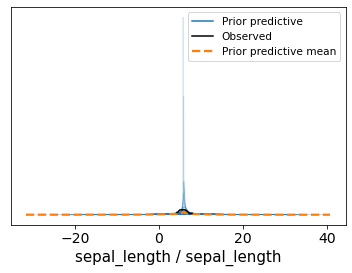

In [31]:
 idata_pymc3 = az.from_pymc3(    # FOR ARVIZ USAGE
        trace,
        prior=prior,
        posterior_predictive=posterior_predictive,
        coords={"sepal_length": sepal_length},
        dims=dims
    )


az.plot_ppc(idata_pymc3 ,group='prior') # plot prior predictive dist


# **>It can be seen that from above prior checks this not properly fit but according the value of mu and sigma results of prior checks is not so bad**

# **>With changing tuning steps,mu and sigma value prior checks accurate can be increased**

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f88c5912dc0>,
      dtype=object)

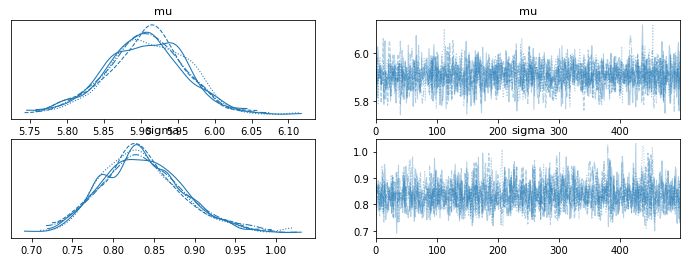

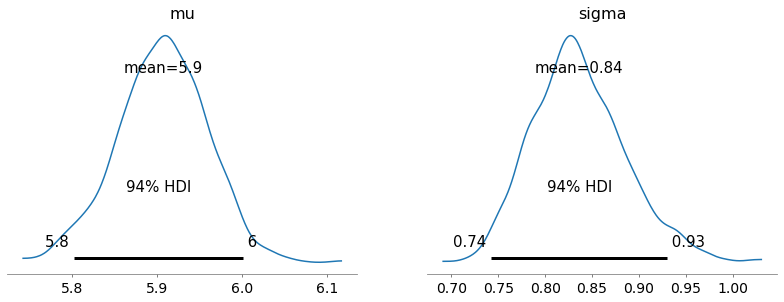

In [32]:
az.plot_trace(trace) 

az.plot_posterior(trace) # plot posterior distributıon after seing data



# **>As it can be seen from above graph posterior distrubions has been plotted after seeing data**

# **>The mu and sigma value has huge office noice, it means there are several factors effects this data**

# **>Also it can be seen that in 954 interval the posterior distrbuion fit is good for model**

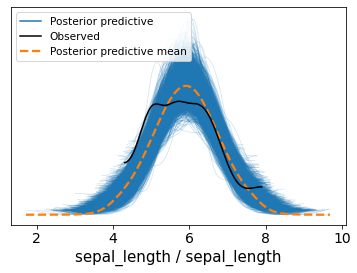

In [33]:
az.plot_ppc(idata_pymc3 ,group='posterior')#posterior predictive dist

# **> Finally we can see that posterior,oberved and posterior predictive mean trend in above graph**

# **> According the mean of the results we can say that model is valid and fit properly but if we consider all of the posterior data  although in %94 of interval regarding to mean extreme points or in other words extreme posteriors is not fit good and should calculated again**


# **> Finally, changing mu and sigma data model can be changed also preior and posterior checks ca be changed. In future works , we can change the distribuiton type such as t-dist, poisson distribution etc and we can monitor the results**